# 🏆 Nobel Minds: A Visual Story of 115 Years of Human Achievement (1901-2016)

---

## Introduction

The Nobel Prize is one of the most prestigious awards in the world, recognizing individuals and organizations for their outstanding contributions to humanity. This notebook provides a comprehensive **Exploratory Data Analysis (EDA)** of Nobel Prize laureates from **1901 to 2016**.

We will use a combination of **Plotly**, **Seaborn**, and **Matplotlib** to create both static and **animated visualizations** that tell the compelling story behind the data.

---

### Key Questions We'll Explore:

1.  Which countries have dominated the Nobel Prize?
2.  How has the gender gap evolved over the decades?
3.  At what age do people typically win the Nobel Prize?
4.  What are the trends across different prize categories?

Let's begin our journey through the data!

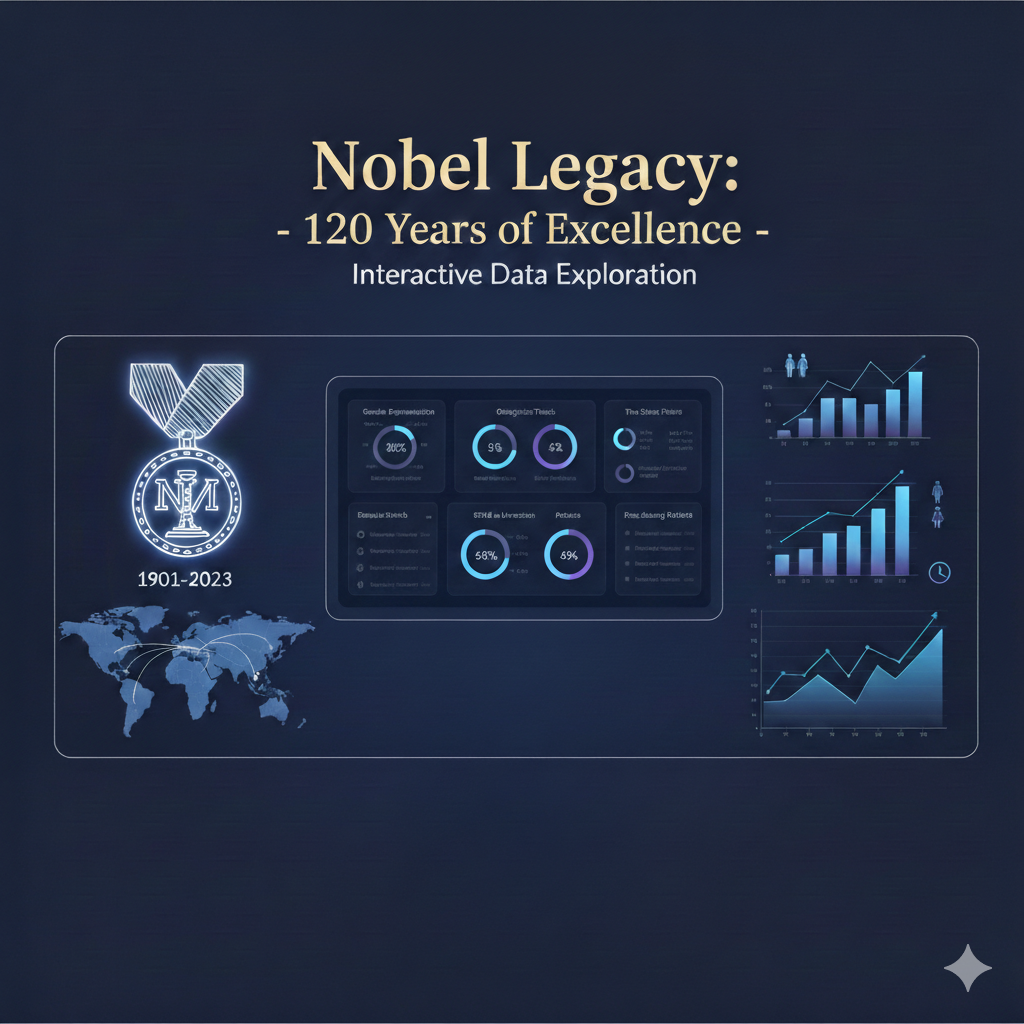

In [24]:
from IPython.display import Image
Image(filename = "Nobel Prize Visual Archive.png")

## 1. Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
# Load the dataset
df = pd.read_csv('SDnobel.csv')

# Display basic info
print(f"Dataset Shape: {df.shape}")
print(f"\nColumn Names: {df.columns.tolist()}")
df.head()

Dataset Shape: (911, 24)

Column Names: ['Unnamed: 0', 'year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id', 'laureate_type', 'full_name', 'birth_date', 'birth_city', 'birth_country', 'sex', 'organization_name', 'organization_city', 'organization_country', 'death_date', 'death_city', 'death_country', 'usa_born_winner', 'decade', 'female', 'age', 'age_group']


,Unnamed: 0,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,...,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female,age,age_group
0,0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,...,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900,False,49.0,Adult
1,1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,...,NaN,NaN,1907-09-07,Châtenay,France,False,1900,False,62.0,Adult
2,2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,...,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900,False,47.0,Adult
3,3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,...,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900,False,73.0,Senior
4,4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,...,NaN,NaN,1912-06-12,Paris,France,False,1900,False,79.0,Senior


---

## 2. 📊 Professional Dashboard: Key Statistics

A quick overview of the most important numbers in the dataset.

In [3]:
# Calculate key metrics
total_laureates = df.shape[0]
total_prizes = int((df[df['prize_share'] == '1/1'].shape[0]) + (df[df['prize_share'] == '1/2'].shape[0] / 2) + (df[df['prize_share'] == '1/3'].shape[0] / 3) + (df[df['prize_share'] == '1/4'].shape[0] / 4))
total_countries = df['birth_country'].nunique()
female_pct = round((df[df['sex'] == 'Female'].shape[0] / total_laureates) * 100, 1)

# Create the dashboard
fig = make_subplots(
    rows=1, cols=4,
    specs=[[{'type': 'indicator'}, {'type': 'indicator'}, {'type': 'indicator'}, {'type': 'indicator'}]]
)

fig.add_trace(go.Indicator(
    mode="number",
    value=total_laureates,
    title={"text": "<b>Total Laureates</b>", "font": {"size": 20}},
    number={"font": {"size": 50, "color": "#1f77b4"}}
), row=1, col=1)

fig.add_trace(go.Indicator(
    mode="number",
    value=total_prizes,
    title={"text": "<b>Total Prizes</b>", "font": {"size": 20}},
    number={"font": {"size": 50, "color": "#2ca02c"}}
), row=1, col=2)

fig.add_trace(go.Indicator(
    mode="number",
    value=total_countries,
    title={"text": "<b>Countries</b>", "font": {"size": 20}},
    number={"font": {"size": 50, "color": "#ff7f0e"}}
), row=1, col=3)

fig.add_trace(go.Indicator(
    mode="number",
    value=female_pct,
    title={"text": "<b>Female %</b>", "font": {"size": 20}},
    number={"font": {"size": 50, "color": "#d62728"}, "suffix": "%"}
), row=1, col=4)

fig.update_layout(
    title_text="<b>🏅 Nobel Prize Dashboard (1901-2016)</b>",
    title_x=0.5,
    paper_bgcolor="#f9f9f9",
    height=250
)
fig.show()

---

## 3. 🌍 The Rise of Nations: An Animated Bar Chart Race

**Storytelling**: Which countries have dominated the Nobel Prize over the decades? Let's visualize the cumulative number of prizes won by each country as the years progress. This animation reveals how the United States rose to prominence in the mid-20th century.

In [14]:
# Prepare data for animation
df_countries = df[['year', 'birth_country']].dropna()
df_countries['count'] = 1

# Get cumulative counts per year and country
country_year_counts = df_countries.groupby(['year', 'birth_country']).size().reset_index(name='count')
country_year_counts = country_year_counts.sort_values('year')

# Calculate cumulative sum
all_years = sorted(df_countries['year'].unique())
all_countries = df_countries['birth_country'].unique()

cumulative_data = []
cumulative_totals = {country: 0 for country in all_countries}

for year in all_years:
    year_data = country_year_counts[country_year_counts['year'] == year]
    for _, row in year_data.iterrows():
        cumulative_totals[row['birth_country']] += row['count']
    for country, total in cumulative_totals.items():
        cumulative_data.append({'year': year, 'birth_country': country, 'cumulative_count': total})

df_cumulative = pd.DataFrame(cumulative_data)

# Get top 10 countries for each year for cleaner animation
df_animated = df_cumulative.groupby('year').apply(lambda x: x.nlargest(10, 'cumulative_count')).reset_index(drop=True)

print("Data prepared for animation. Creating chart...")

Data prepared for animation. Creating chart...


In [15]:
# Create animated bar chart
fig_race = px.bar(
    df_animated,
    x="cumulative_count",
    y="birth_country",
    color="birth_country",
    animation_frame="year",
    orientation='h',
    range_x=[0, df_animated['cumulative_count'].max() + 20],
    title="<b>🌍 The Rise of Nations: Cumulative Nobel Prizes Over Time</b>",
    labels={'cumulative_count': 'Total Prizes', 'birth_country': 'Country'}
)

fig_race.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    showlegend=False,
    height=600,
    xaxis_title="Cumulative Nobel Prizes",
    yaxis_title=""
)

fig_race.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 200
fig_race.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 100

fig_race.show()

---

## 4. 👩‍🔬 The Gender Gap: A Slow but Growing Change

**Storytelling**: Women have historically been underrepresented in Nobel Prize wins. This section explores how that representation has evolved over time, and in which categories women have made the most significant strides.

In [16]:
# Gender Distribution Pie Chart
gender_counts = df['sex'].value_counts().reset_index()
gender_counts.columns = ['sex', 'count']

fig_pie = px.pie(
    gender_counts,
    values='count',
    names='sex',
    title='<b>👫 Gender Distribution of Nobel Laureates</b>',
    color='sex',
    color_discrete_map={'Male': '#1f77b4', 'Female': '#e377c2'},
    hole=0.4
)
fig_pie.update_traces(textposition='inside', textinfo='percent+label')
fig_pie.show()

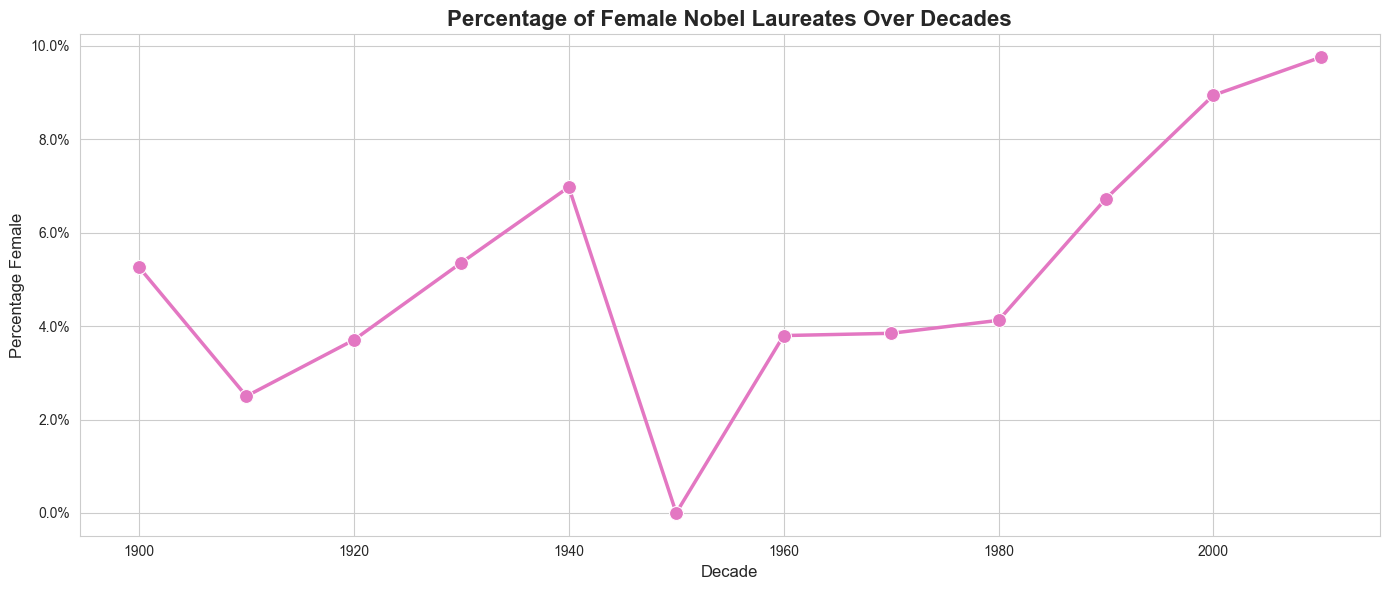

In [17]:
# Female laureates over decades (Seaborn)
df['female'] = df['sex'] == 'Female'
df['decade'] = (np.floor(df['year'] / 10) * 10).astype(int)
fem_winner = df.groupby('decade', as_index=False)['female'].mean()

fig_dims = (14, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=fem_winner, x='decade', y='female', marker='o', color='#e377c2', linewidth=2.5, markersize=10)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_title('Percentage of Female Nobel Laureates Over Decades', fontsize=16, fontweight='bold')
ax.set_xlabel('Decade', fontsize=12)
ax.set_ylabel('Percentage Female', fontsize=12)
plt.tight_layout()
plt.show()

In [18]:
# Female laureates by category
fem_df = df[df['female']]['category'].value_counts().reset_index()
fem_df.columns = ['category', 'count']

fig_fem_cat = px.bar(
    fem_df,
    x='category',
    y='count',
    color='category',
    text='count',
    title='<b>👩‍🔬 Female Laureates by Category</b>',
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig_fem_cat.update_layout(showlegend=False)
fig_fem_cat.show()

---

## 5. 📈 Age of Discovery: When Do Winners Achieve Greatness?

**Storytelling**: At what age do people typically make their Nobel-winning discoveries? This animated histogram shows how the age distribution of laureates has shifted over the decades.

In [19]:
# Animated histogram of laureate ages
df_age = df[['decade', 'age', 'category']].dropna()

fig_age_hist = px.histogram(
    df_age,
    x='age',
    color='category',
    animation_frame='decade',
    nbins=30,
    range_x=[20, 100],
    title='<b>📈 Age Distribution of Nobel Laureates Over Decades</b>',
    labels={'age': 'Age at Time of Award', 'category': 'Category'}
)

fig_age_hist.update_layout(height=500, bargap=0.1)
fig_age_hist.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 800
fig_age_hist.show()

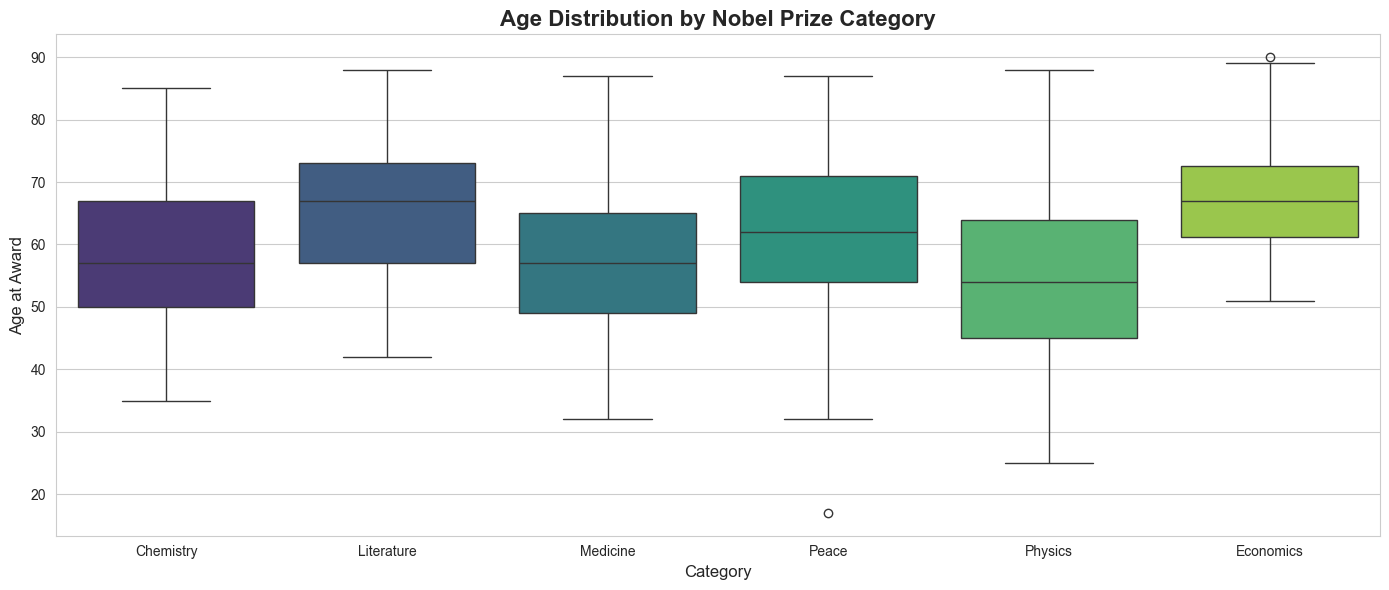

In [20]:
# Seaborn: Age distribution by category (static)
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(data=df, x='category', y='age', palette='viridis', ax=ax)
ax.set_title('Age Distribution by Nobel Prize Category', fontsize=16, fontweight='bold')
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Age at Award', fontsize=12)
plt.tight_layout()
plt.show()

---

## 6. 🇺🇸 The US Dominance

**Storytelling**: The United States has consistently dominated the Nobel Prize landscape, especially after World War II. Let's explore this trend in detail.

In [21]:
# US-born winner proportion over decades
df['usa_born_winner'] = df['birth_country'] == 'United States of America'
usa = df.groupby('decade', as_index=False)['usa_born_winner'].mean()

fig_usa = px.line(
    usa,
    x='decade',
    y='usa_born_winner',
    markers=True,
    title='<b>🇺🇸 Proportion of US-Born Nobel Laureates Over Time</b>',
    labels={'usa_born_winner': '% US-Born', 'decade': 'Decade'}
)
fig_usa.update_traces(line=dict(color='royalblue', width=3), marker=dict(size=10))
fig_usa.update_layout(
    yaxis_tickformat='.0%',
    yaxis_title='Percentage of Winners',
    height=450
)
fig_usa.show()

---

## 7. 🗺️ Geospatial Analysis: Where Do Winners Come From?

**Storytelling**: Let's map the global distribution of Nobel laureates to see which regions have contributed the most to scientific and cultural advancement.

In [22]:
# World map of laureates
country_counts = df['birth_country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

fig_map = px.choropleth(
    country_counts,
    locations='country',
    locationmode='country names',
    color='count',
    hover_name='country',
    color_continuous_scale='Blues',
    title='<b>🗺️ Global Distribution of Nobel Laureates by Birth Country</b>'
)
fig_map.update_layout(height=500)
fig_map.show()

---

## 8. 📚 Category Trends Over Time

**Storytelling**: How has the distribution of prizes across categories changed over the decades? This animated stacked area chart reveals the evolution of the Nobel Prize landscape.

In [23]:
# Category distribution by decade
cat_decade = df.groupby(['decade', 'category']).size().reset_index(name='count')

fig_cat = px.bar(
    cat_decade,
    x='decade',
    y='count',
    color='category',
    title='<b>📚 Nobel Prize Categories Over Decades</b>',
    labels={'count': 'Number of Prizes', 'decade': 'Decade'},
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig_cat.update_layout(barmode='stack', height=500)
fig_cat.show()

---

## 9. 🏁 Conclusion: Key Insights

Through this analysis, we have uncovered several fascinating trends:

1.  **US Dominance**: The United States has been the dominant force in Nobel Prizes, especially from the 1950s onwards, with over 40% of laureates in some decades.
2.  **Gender Gap**: While the percentage of female laureates has increased over time (reaching nearly 10% in the 2010s), significant underrepresentation remains, particularly in Physics and Economics.
3.  **Age of Achievement**: The average age of laureates has been steadily increasing, suggesting that breakthroughs require more time and accumulated knowledge.
4.  **Peace and Literature for Women**: Women have achieved the most recognition in the Peace and Literature categories.

---

**Thank you for exploring the Nobel Prize data with us!**

*Prepared by: Eng. Hassan Jameel*

**LinkedIn:** [linkedin](https://www.linkedin.com/in/hassanjameel/)  
**GitHub:** [Github](https://github.com/HassanJamel/)  
**Portfolio:** [Portfolio](https://hassanjamel.github.io/my_profile/)